## //TODO: Get Y Labels
#### You should probably do this in API.py, so that there can be a different method you call from this cell which chooses tickers, calls getSamples to retrieve the requested X data, selects the samples we want from the X data, and then calculates Y using the <date> in X

In [14]:
import os
import requests
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

import statsmodels.tsa.api as tsa
from scipy.stats import probplot, moment

import matplotlib.pyplot as plt
import seaborn as sns

from api_keys import fmp_api_key as api_key
from API import API

# First row is completely random, check to make sure they have enough data (https://raybb.github.io/random-stock-picker/)
# Second row are stocks I picked from the S&P 500
# Third row are stocks I picked from the Russel 2000
randomTickers = [
    'BFOR', 'REZI', 'BSCM', 'VOSO', 'CSR', 'SOGO', 'SRL', 'CD', 'MDXG',
    'AAPL', 'MSFT', 'FB', 'TSLA', 'BLK',
    'CZR', 'ANF', 'ARAY', 'AVAV', 'AGFY'
]

api = API(api_key, period='quarter', limit=52)
res = api.getSamples("AAPL")

display(res)
print(res.dtypes)
print(len(res))

,symbol,date,currentRatio,quickRatio,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,debtEquityRatio,...,growthCostOfRevenue,growthGrossProfit,growthGrossProfitRatio,growthOperatingExpenses,growthEBITDA,growthOperatingIncome,growthNetIncome,growthEPS,marketCapitalization,enterpriseValue
0,AAPL,2008-03-29,2.775171,2.184036,0.329340,0.175053,0.034295,0.057885,0.063109,0.687864,...,-0.197259,-0.257503,-0.050331,-0.038972,-0.358871,-0.381468,-0.339026,-0.342543,1.257839e+11,1.167139e+11
1,AAPL,2008-06-28,3.036233,2.427533,0.348339,0.186495,0.033807,0.054633,0.061891,0.615992,...,-0.034538,0.050930,0.057688,0.042278,0.054507,0.058555,0.025837,0.016800,1.503150e+11,1.409420e+11
2,AAPL,2008-09-27,2.641141,2.159405,0.346928,0.182647,0.028707,0.050949,0.051115,0.831592,...,0.060033,0.053462,-0.004049,0.073675,0.044400,0.035920,0.059701,-0.074374,1.133306e+11,1.014556e+11
3,AAPL,2008-12-27,2.382801,1.886766,0.347398,0.209108,0.037511,0.070060,0.075847,0.867694,...,0.286850,0.289522,0.001355,0.084040,0.449239,0.474341,0.412852,0.616075,7.629728e+10,6.906128e+10
4,AAPL,2009-03-28,2.461857,1.959494,0.363959,0.204214,0.027870,0.049566,0.056535,0.778495,...,-0.217483,-0.158834,0.047671,-0.072546,-0.194834,-0.215898,-0.249221,-0.254150,9.522260e+10,9.075660e+10
5,AAPL,2009-06-27,2.110918,1.615029,0.362600,0.200552,0.025530,0.047474,0.053115,0.859549,...,0.023498,0.017503,-0.003734,0.036043,0.004894,0.002999,0.019917,0.022234,1.273003e+11,1.216953e+11
6,AAPL,2009-09-26,2.742482,2.331392,0.366160,0.222188,0.030919,0.052623,0.051789,0.822345,...,0.177268,0.195501,0.009817,0.051813,0.293290,0.311603,0.354760,0.340563,1.637741e+11,1.585111e+11
7,AAPL,2009-12-26,2.545010,2.129190,0.408787,0.301282,0.062641,0.094442,0.115727,0.507660,...,0.482097,0.773935,0.116415,0.186488,1.064435,1.154583,1.028829,1.021628,1.911985e+11,1.835895e+11
8,AAPL,2010-03-27,2.644206,2.129446,0.416698,0.294763,0.053876,0.078123,0.088761,0.450061,...,-0.150777,-0.122602,0.019352,-0.023725,-0.149777,-0.157884,-0.089994,-0.093583,2.095528e+11,1.995348e+11
9,AAPL,2010-06-26,2.308032,1.776518,0.390828,0.269682,0.050259,0.075456,0.086209,0.501357,...,0.214630,0.090844,-0.062082,0.155529,0.074374,0.064086,0.058230,0.053101,2.432829e+11,2.335779e+11


symbol                             object
date                               object
currentRatio                      float64
quickRatio                        float64
grossProfitMargin                 float64
operatingProfitMargin             float64
returnOnAssets                    float64
returnOnEquity                    float64
returnOnCapitalEmployed           float64
debtEquityRatio                   float64
priceToBookRatio                  float64
priceToSalesRatio                 float64
priceEarningsRatio                float64
priceEarningsToGrowthRatio        float64
priceToOperatingCashFlowsRatio    float64
growthRevenue                     float64
growthCostOfRevenue               float64
growthGrossProfit                 float64
growthGrossProfitRatio            float64
growthOperatingExpenses           float64
growthEBITDA                      float64
growthOperatingIncome             float64
growthNetIncome                   float64
growthEPS                         

## Initial Feature Selection

In [15]:
datetime_series = pd.to_datetime(res['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
df=res.set_index(datetime_index)
df.drop('date',axis=1,inplace=True)
# features = [
#     "currentRatio", "quickRatio", "grossProfitMargin", "operatingProfitMargin", "returnOnAssets",
#     "returnOnEquity", "returnOnCapitalEmployed", "debtEquityRatio", "priceToBookRatio", "priceToSalesRatio",
#     "priceEarningsRatio", "priceEarningsToGrowthRatio", "priceToOperatingCashFlowsRatio" 
# ]
df = df.squeeze().dropna()

## Scaling/ Normalization

In [16]:
# min_max_scaler = MinMaxScaler((-1, 1))
# df[percentages] = min_max_scaler.fit_transform(df[percentages])  # No need, because percentages are already on a good scale
ss = StandardScaler()
df_without_symbol = df.loc[:, df.columns != 'symbol']
df_scaled = pd.DataFrame(ss.fit_transform(df_without_symbol), columns = df_without_symbol.columns).set_index(res['date'])
display(df_scaled)



,currentRatio,quickRatio,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,debtEquityRatio,priceToBookRatio,priceToSalesRatio,...,growthCostOfRevenue,growthGrossProfit,growthGrossProfitRatio,growthOperatingExpenses,growthEBITDA,growthOperatingIncome,growthNetIncome,growthEPS,marketCapitalization,enterpriseValue
date,,,,,,,,,,,,,,,,,,,,,
2008-03-29,2.207745,2.029303,-2.452802,-2.066034,-0.797421,-0.781617,-0.652200,-0.682352,-0.026796,0.689442,...,-0.953916,-1.070347,-1.366480,-1.212038,-1.206800,-1.132033,-1.074986,-1.087047,-1.138124,-1.148501
2008-06-28,2.723357,2.588610,-1.646972,-1.817311,-0.827921,-0.835029,-0.693611,-0.758385,0.090429,1.490192,...,-0.405195,-0.138867,1.380405,-0.043446,-0.162290,-0.172381,-0.247061,-0.283553,-1.081643,-1.096168
2008-09-27,1.943028,1.972727,-1.706787,-1.900957,-1.147039,-0.895525,-1.060168,-0.530302,-0.345578,0.125691,...,-0.086290,-0.131221,-0.189529,0.408139,-0.187828,-0.221747,-0.170218,-0.487419,-1.166796,-1.181458
2008-12-27,1.432794,1.346481,-1.686852,-1.325758,-0.596170,-0.581690,-0.218914,-0.492109,-0.641968,-1.490382,...,0.678571,0.581691,-0.052126,0.557210,0.835103,0.734414,0.631129,1.056431,-1.252062,-1.251430
2009-03-28,1.588933,1.513536,-0.984432,-1.432138,-1.199441,-0.918228,-0.875795,-0.586472,-0.542783,-0.508813,...,-1.022113,-0.772361,1.125679,-1.694930,-0.792316,-0.770941,-0.871207,-0.889399,-1.208488,-1.204568
2009-06-27,0.895809,0.722310,-1.042067,-1.511751,-1.345848,-0.952587,-0.992141,-0.500726,-0.373558,0.341455,...,-0.209492,-0.239818,-0.181520,-0.133120,-0.287651,-0.293543,-0.260495,-0.271402,-1.134632,-1.137741
2009-09-26,2.143182,2.367777,-0.891088,-1.041415,-1.008669,-0.868024,-1.037240,-0.540084,-0.329780,0.653755,...,0.309042,0.297745,0.163063,0.093703,0.441058,0.379495,0.499310,0.440384,-1.050655,-1.058219
2009-12-26,1.753165,1.903323,0.916890,0.677903,0.976181,-0.181298,1.137543,-0.872989,-0.301136,-0.384652,...,1.336971,2.044638,2.873803,2.030697,2.389560,2.217964,2.028865,1.963251,-0.987513,-1.004050
2010-03-27,1.949083,1.903913,1.252428,0.536192,0.427739,-0.449274,0.220350,-0.933923,-0.304501,0.401438,...,-0.797169,-0.662939,0.405543,-0.992744,-0.678469,-0.644415,-0.509898,-0.530371,-0.945254,-0.969608


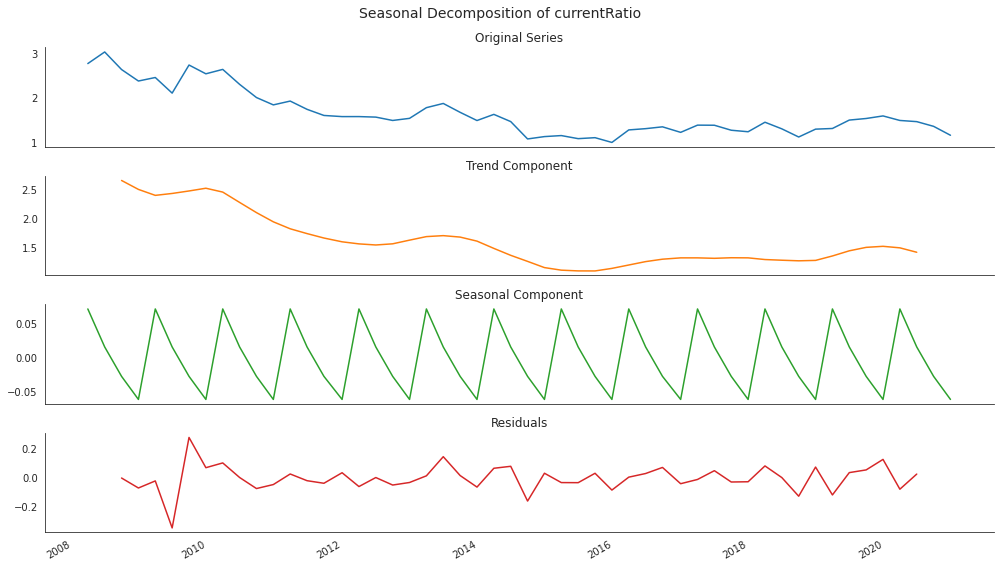

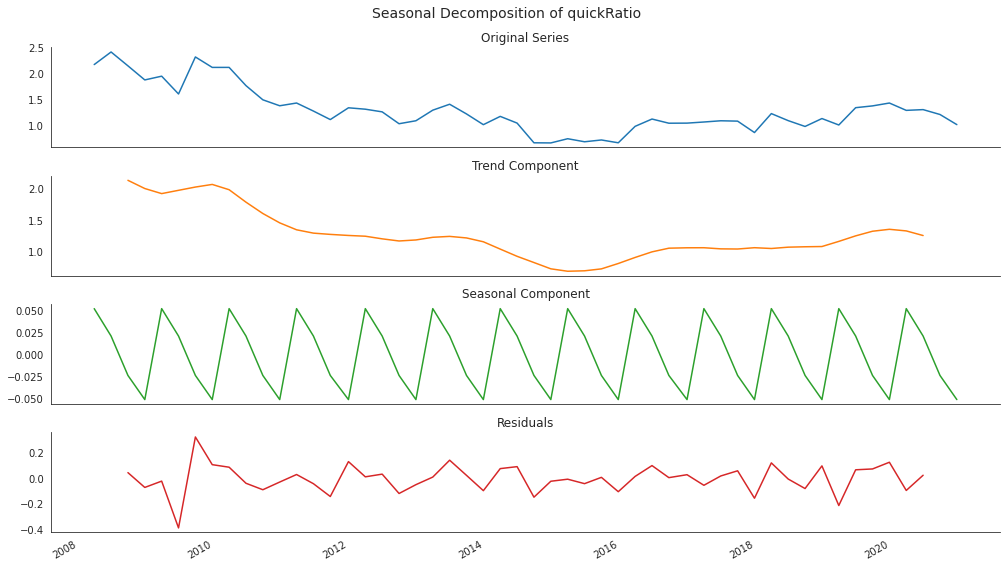

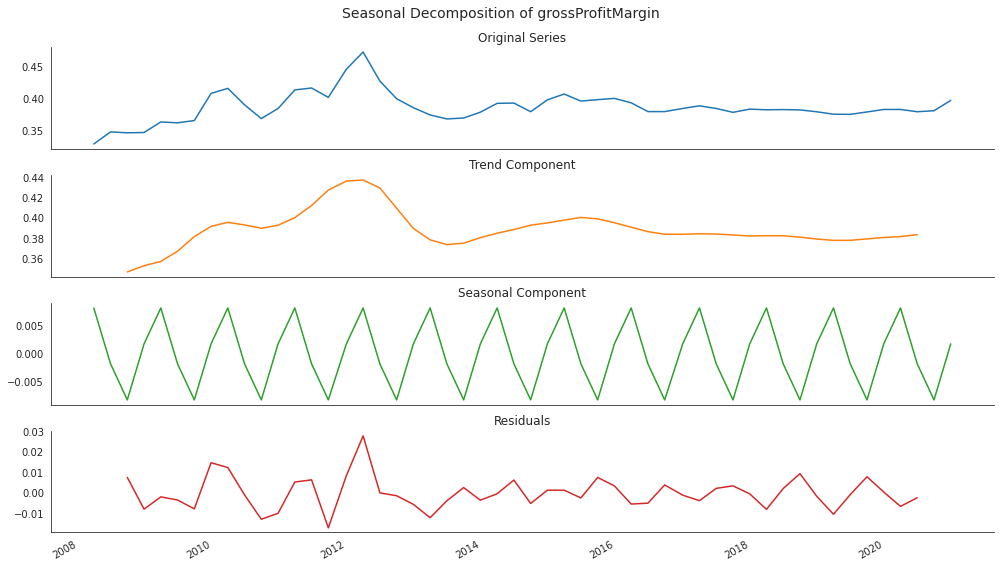

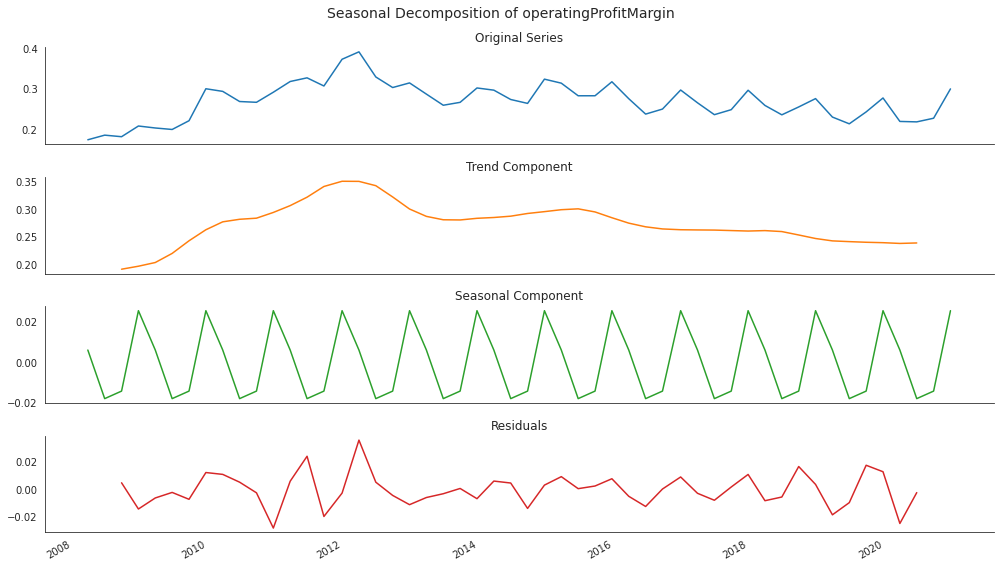

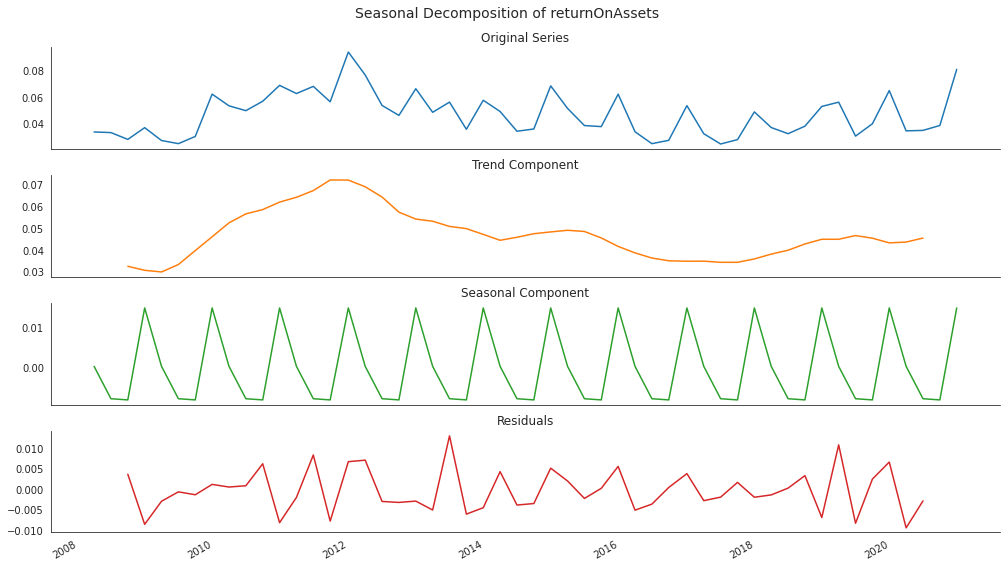

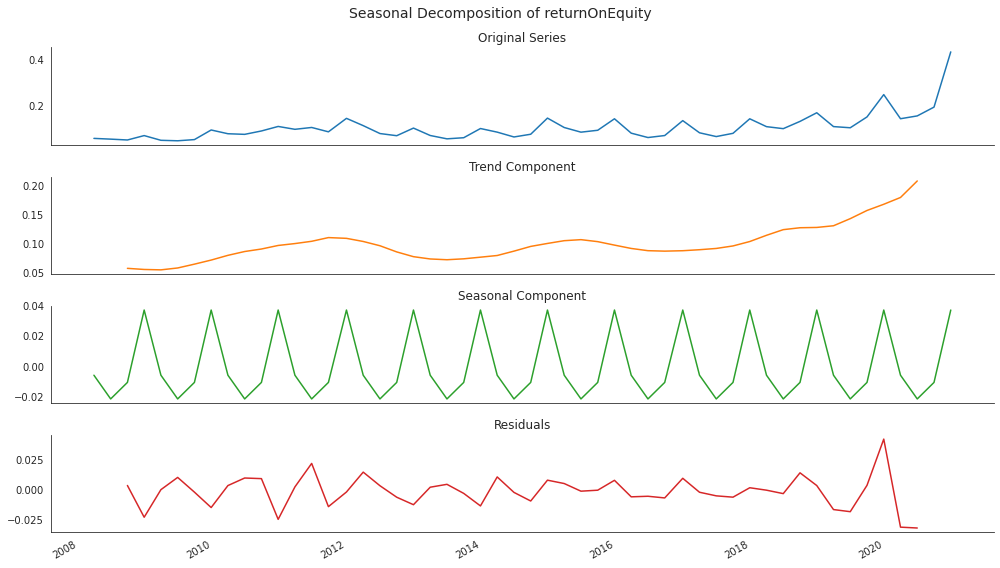

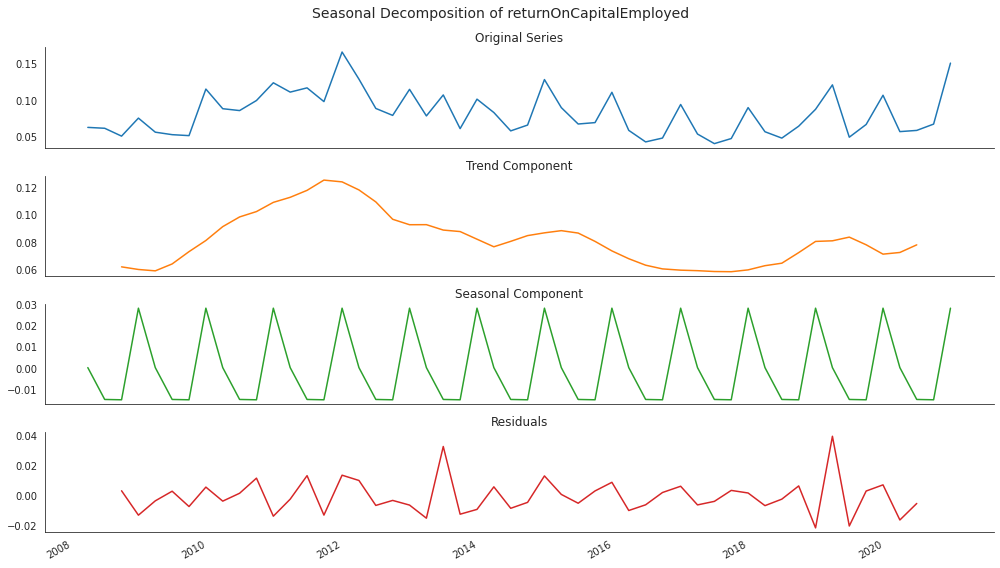

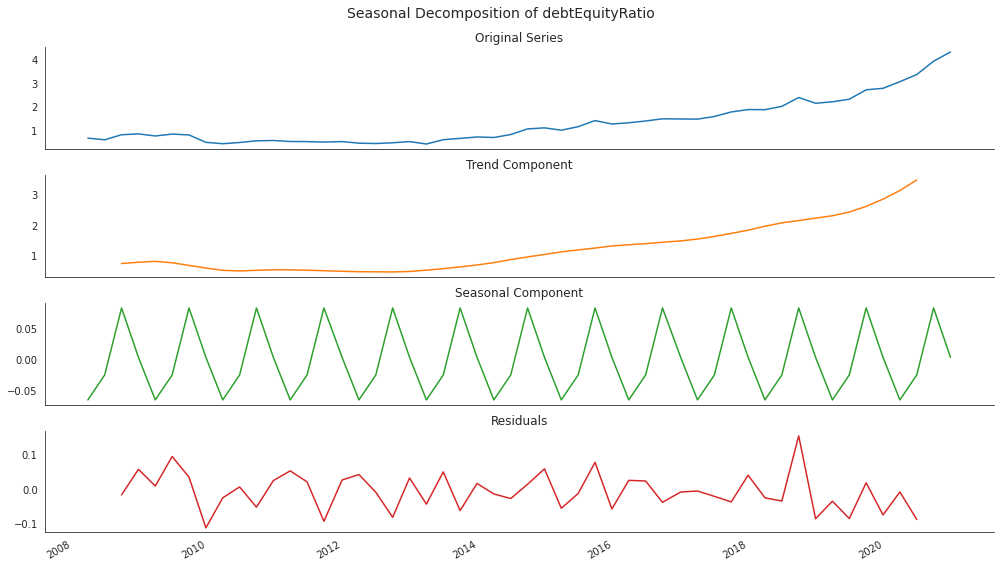

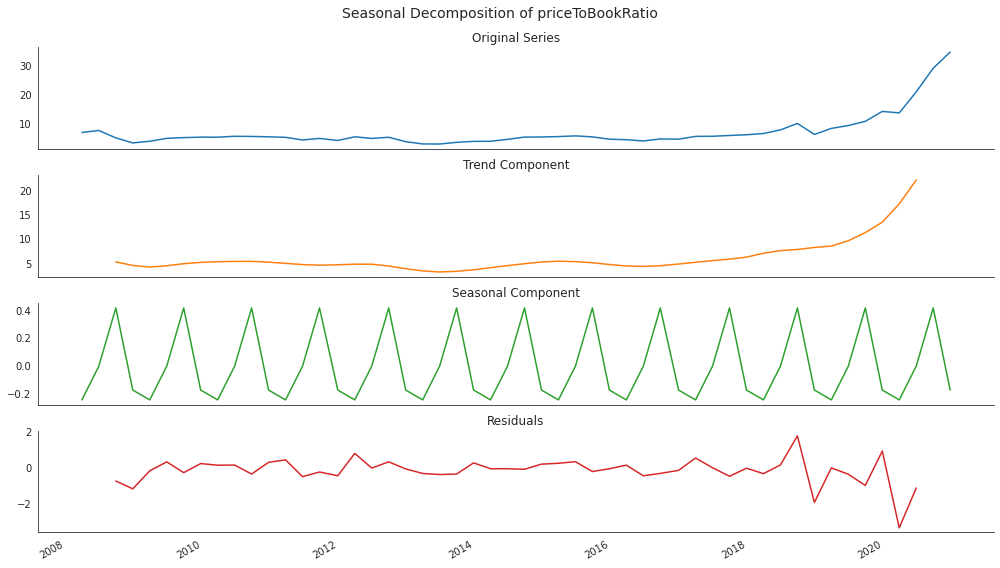

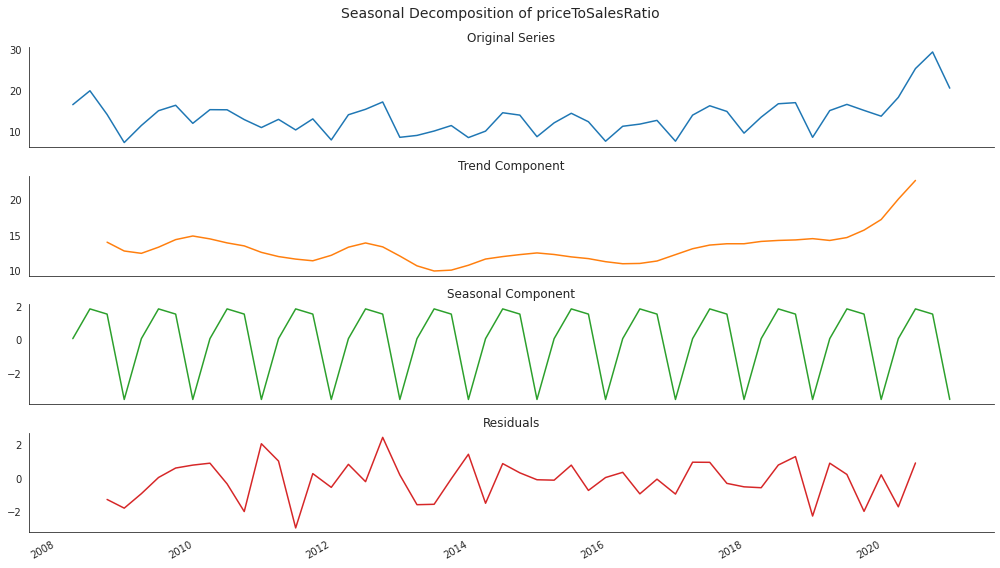

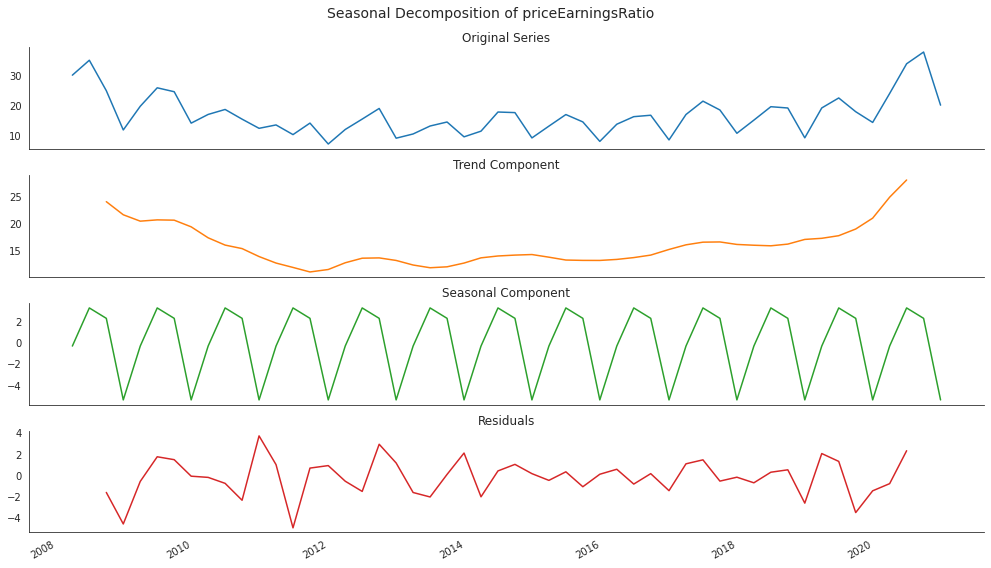

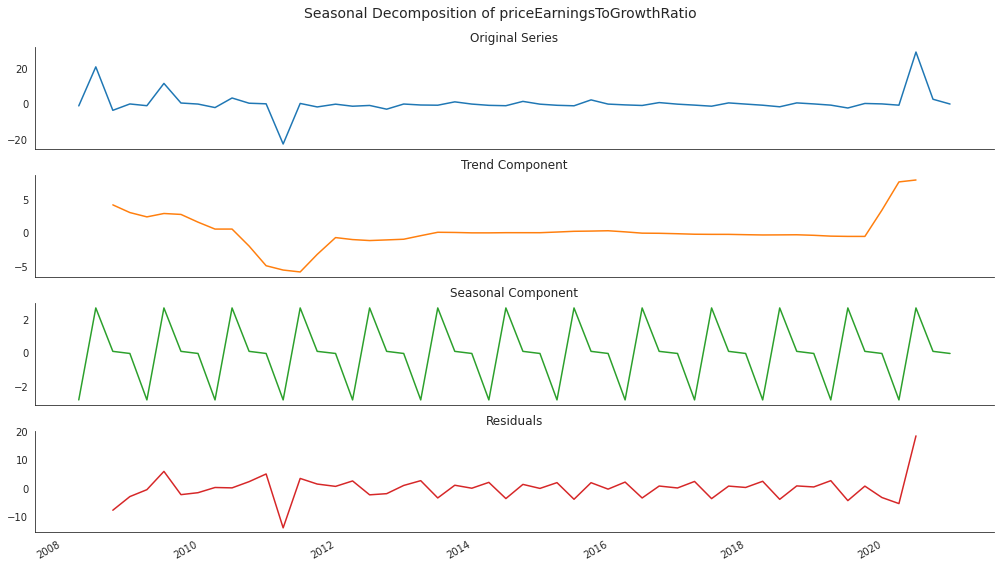

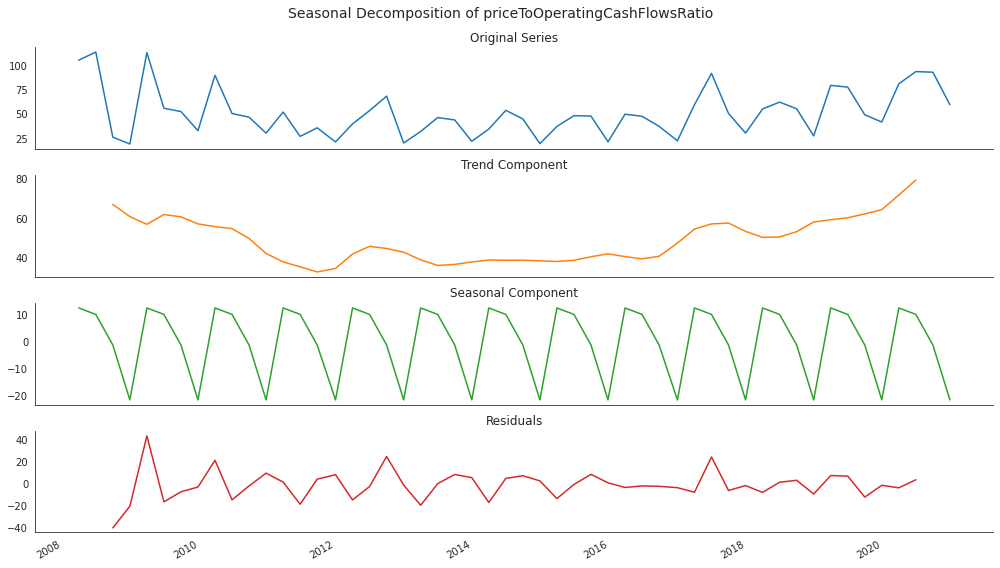

In [5]:
for feat in features:
    ratio = df[feat]
    # We predict that the period is annual, thus 4 quarters.
    components = tsa.seasonal_decompose(ratio, model='additive',period=4)
    X[feat] = components.trend.dropna()
    S[feat] = components.seasonal.dropna()
    # Graph the Trend and Seasonal Effects
    ts = (ratio.to_frame('Original')
      .assign(Trend=components.trend)
      .assign(Seasonality=components.seasonal)
      .assign(Residual=components.resid))
    with sns.axes_style('white'):
        ts.plot(subplots=True, figsize=(14, 8), title=['Original Series', 'Trend Component', 'Seasonal Component','Residuals'], legend=False)
        plt.suptitle('Seasonal Decomposition of ' + feat, fontsize=14)
        sns.despine()
        plt.tight_layout()
        plt.subplots_adjust(top=.91);

## Reduce Dimensionality with PCA
## //TODO: Merge Y Labels onto right of matrix

In [17]:
pca = PCA(n_components='mle')
pc_matrix = pca.fit_transform(df_scaled)
pc = pd.DataFrame(pc_matrix).set_index(res['date'])
# print(pca.components_)
# print(pca.explained_variance_)
display(pc)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
date,,,,,,,,,,,,,,,,,,,,,
2008-03-29,-5.205633,-0.564434,3.351299,0.687871,-0.557750,1.909905,0.342110,-0.957683,0.572445,0.157571,...,-0.042776,0.168665,-0.195162,0.105914,-0.046718,-0.005636,0.032692,-0.059143,0.017237,-0.023052
2008-06-28,-3.192421,0.347829,5.817398,2.038203,1.426974,-1.508408,0.810790,-0.516550,0.438704,0.103151,...,-0.104050,0.002913,0.006087,0.041687,0.013221,0.046623,0.036333,0.038164,-0.035720,0.000205
2008-09-27,-2.021490,-1.617956,3.442947,-0.586402,-1.075484,0.910219,-0.368751,1.433986,-0.407908,0.765463,...,0.031524,0.209304,0.206759,-0.092067,0.023919,-0.078377,-0.054825,-0.008715,-0.005755,0.004754
2008-12-27,1.134484,-2.474759,2.995593,-1.462104,-1.150227,0.505711,0.866797,0.488795,-0.600106,0.017044,...,-0.092822,-0.077230,-0.022693,-0.051018,-0.131922,0.094405,0.123672,-0.007437,-0.006209,-0.007055
2009-03-28,-4.009807,-1.460080,2.109570,1.167367,-1.675822,-0.863032,0.433014,-1.331981,0.431399,-0.825006,...,0.239665,0.073276,0.124734,-0.115319,0.078423,0.019673,-0.021229,0.006631,0.000908,0.021667
2009-06-27,-2.360317,-0.684878,2.821081,-0.792526,0.938251,-0.799564,0.316494,0.079518,-0.156292,0.498515,...,-0.101505,-0.012977,0.010722,-0.009280,-0.034327,0.010853,-0.024364,0.005159,0.018296,0.007415
2009-09-26,-0.872869,-1.154865,3.985943,0.330335,-0.506402,0.151494,-0.997822,0.234711,-0.891692,0.196156,...,-0.142781,-0.023728,-0.097049,0.083290,-0.035890,0.006843,-0.034935,0.064119,0.022251,0.014358
2009-12-26,5.503414,-2.174879,3.269259,2.126593,-0.502569,-1.316003,-0.833672,0.642164,-0.114055,-0.103453,...,-0.157540,0.004455,0.035644,0.120048,0.179556,-0.041450,0.018408,-0.032748,-0.021269,0.002186
2010-03-27,-2.012068,-1.749072,0.588473,3.154601,-0.053448,0.221534,-0.497483,-0.757252,-0.663237,-0.824857,...,0.038033,-0.176857,0.011000,-0.010638,-0.124563,-0.077450,-0.043486,-0.008499,0.013924,-0.017142


## //TODO: Split data into train and test
## //TODO: Use sklearn.preprocessing.PolynomialFeatures to perform regression using X and Y from the pc matrix
## //TODO: Graph our results
## //TODO: Graph baseline (take the same dates and stocks chosen for X and graph, assuming that the Y estimate was 7%). We choose 7% because that is the historical avg return for the S&P 500, adjusted for inflation